# Continuacion de la clase 10 en separacion de variables para la ecuacion de onda

Encontramos que la solucion a la ecuacion de onda en una
dimension, con condiciones de frontera 0 e iniciales $u(x,0)= \varphi$ y $u_t(x,0)=\psi(x)=0$.

es:

\begin{eqnarray}
u(x,t) &=& \sum_{i=1}^{\infty} a_j \sin \frac{ i \pi x}{\ell} \cos \frac{i \pi c t}{\ell} \\
a_n &=&  \frac{\ell}{2} \int_0^{\ell} \varphi(x) \sin \frac{n \pi x}{\ell} dx
\end{eqnarray}

Vamos a ver un ejemplo en `Python`.

La condicion inicial

\begin{eqnarray}
u(x,0) = \varphi(x) = \left \{
    \begin{array}{cc}
    0  & \text{for } x < 0 \\
    x  & \text{for } 0 \le x < 0.5 \\
    1 - x  & \text{for } 0.5 \le x < 1 \\
    \end{array}
    \right .
\end{eqnarray}


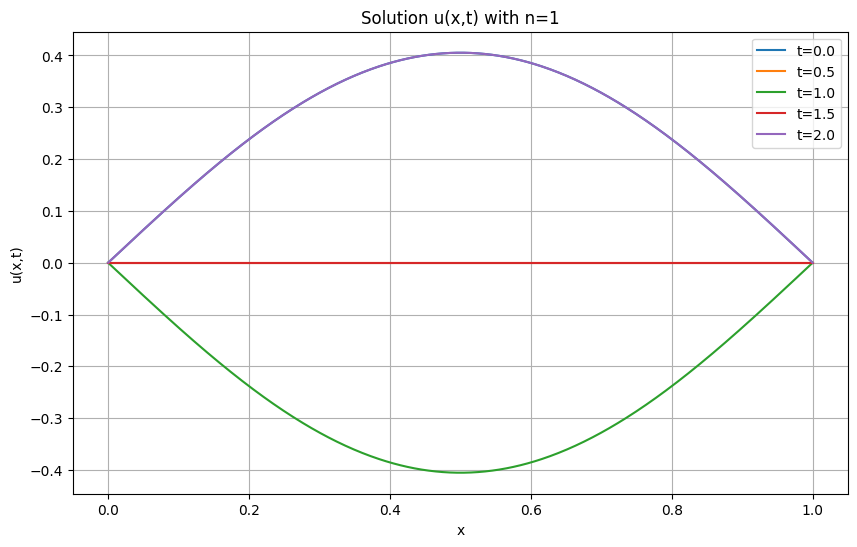

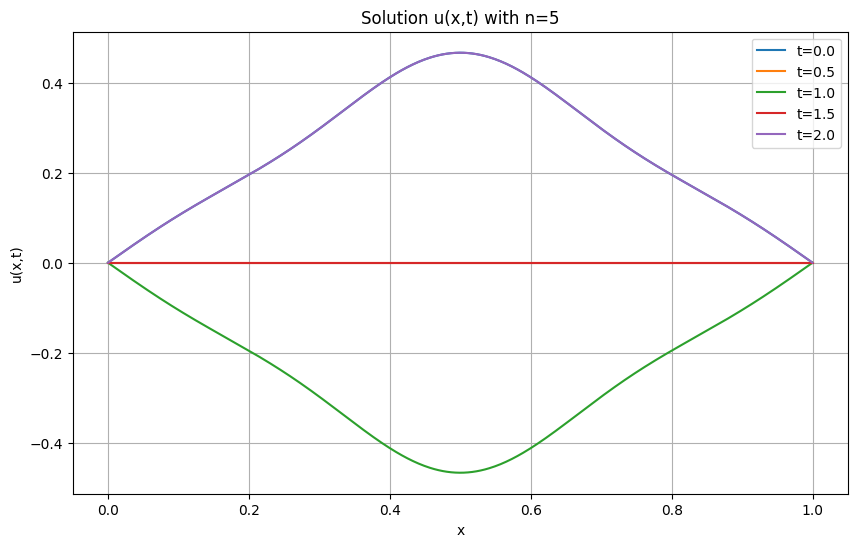

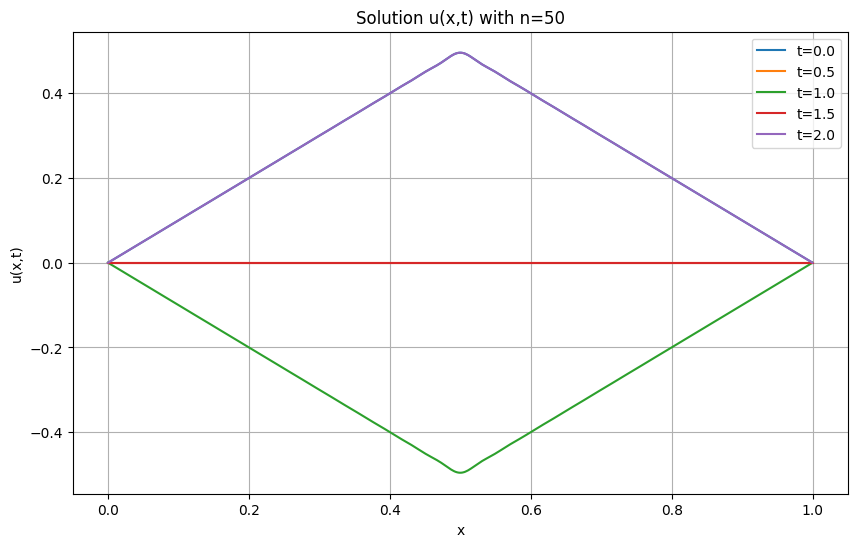

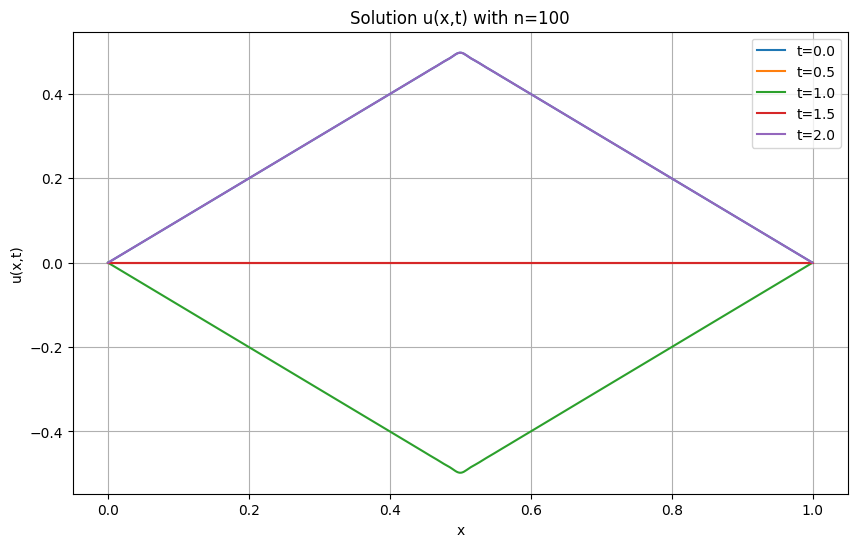

In [23]:
import numpy as np
import matplotlib.pyplot as plt

# Define parameters
l=1.0
c=1.0
nx=500
nt=200
x = l*np.linspace(0,1,nx)
t = c*np.linspace(0,1,nt)

def phi(x):
    return np.piecewise(x,[ x<0, (x >=0) & (x<=0.5) , (x >= 0.5) & (x<=1), x>1],

          [lambda x: 0,
           lambda x: x,
           lambda x: -x + 1,
           lambda x: 0
           ])

y=phi(x)

# calculate coefficients
def a_n(n):
    return (2/l)*np.trapz(y*np.sin(n*np.pi*x/l), x)

# calculate u
def u(x, t, n_terms):
    u_xt = np.zeros_like(x)
    for n in range(0, n_terms+1):
        u_xt += a_n(n)*np.sin(n*np.pi*x/l)*np.cos(n*np.pi*c*t/l)
    return u_xt


n_values=[1,5,50,100]
for n_terms in n_values:
    plt.figure(figsize=(10,6))
    for t_i in np.linspace(0,2,5):
         plt.plot(x, u(x, t_i, n_terms), label=f't={t_i}')
    plt.title(f'Solution u(x,t) with n={n_terms}')
    plt.xlabel('x')
    plt.ylabel('u(x,t)')
    plt.legend()
    plt.grid(True)
    plt.show()


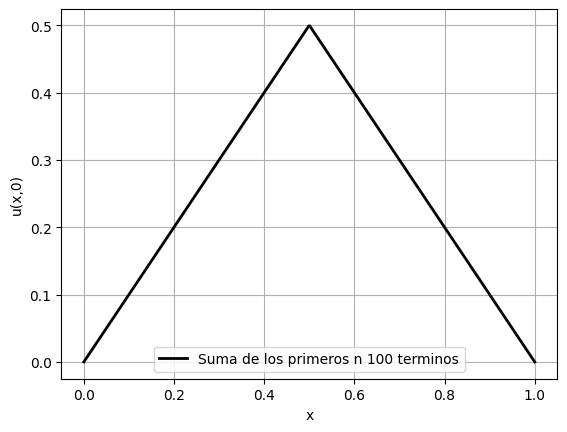

In [24]:
# graficar condicion inicial
plt.xlabel('x')
plt.ylabel('u(x,0)')
plt.grid(True)
plt.plot(x,y, 'k', label=f'Suma de los primeros n {n_terms} terminos', linewidth=2)
plt.legend()
plt.show()

In [25]:
# imprimimos los primeros 10 coeficientes de la suma de Fourier
for n in range(1,11):
    print(f"a(n) = {a_n(n)}")

a(n) = 0.40528406522567495
a(n) = 5.551115123125783e-17
a(n) = -0.04503096781212449
a(n) = 2.7755575615628914e-17
a(n) = 0.0162107199833812
a(n) = 2.0816681711721685e-17
a(n) = -0.008270447576913403
a(n) = -6.938893903907228e-18
a(n) = 0.005002845712180379
a(n) = 1.3877787807814457e-17


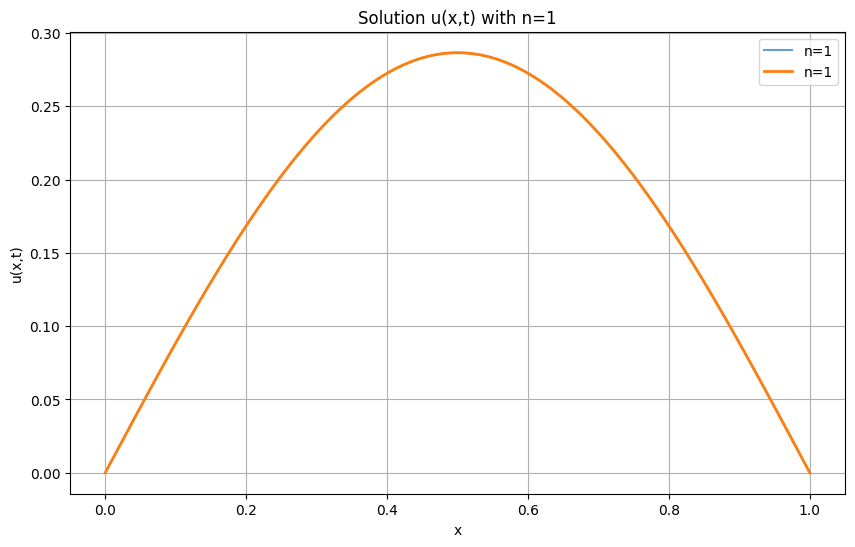

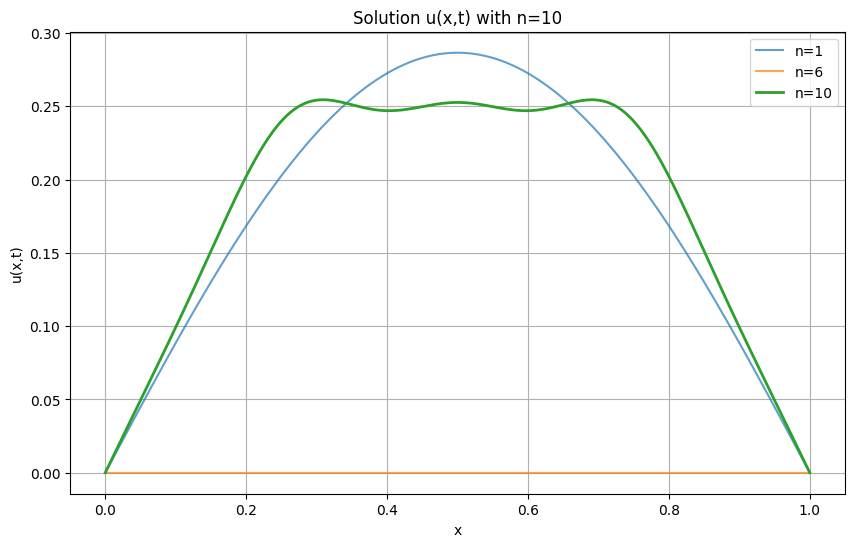

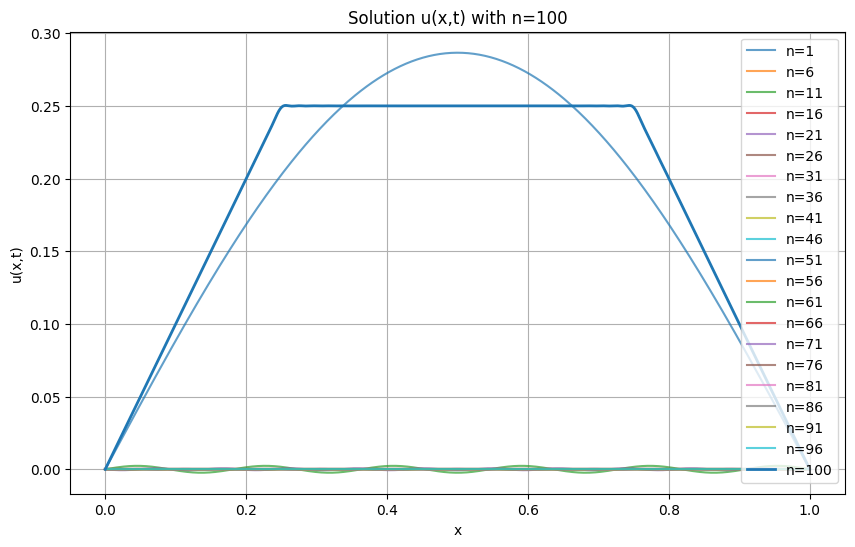

In [26]:
# graficar algunas soluciones en tiempo y numero de terminos
x = np.linspace(0, l, 500)
t = 0.25

# calcule el termino n en la series u(x,t)
def u_n(x,t,n):
    return a_n(n)*np.sin(n*np.pi*x/l)*np.cos(n*np.pi*c*t/l)

# calcule solucion u(x,t) con n terminos
def u(x,t,n_terms):
    u_xt = np.zeros_like(x)
    for n in range(1, n_terms+1):
        u_xt += u_n(x,t,n)
    return u_xt

# graficar componentes individuales y la suma
n_values=[1,10,100]
jump=5
for n_terms in n_values:
    plt.figure(figsize=(10,6))

    # plot individual components
    for n in range(1, n_terms+1, jump):
        plt.plot(x, u_n(x,t,n), label=f'n={n}', alpha=0.7)

     # plot sum of components
    plt.plot(x, u(x,t,n_terms), label=f'n={n_terms}', linewidth=2)

    plt.title(f'Solution u(x,t) with n={n_terms}')
    plt.xlabel('x')
    plt.ylabel('u(x,t)')
    plt.legend()
    plt.grid(True)
    plt.show()


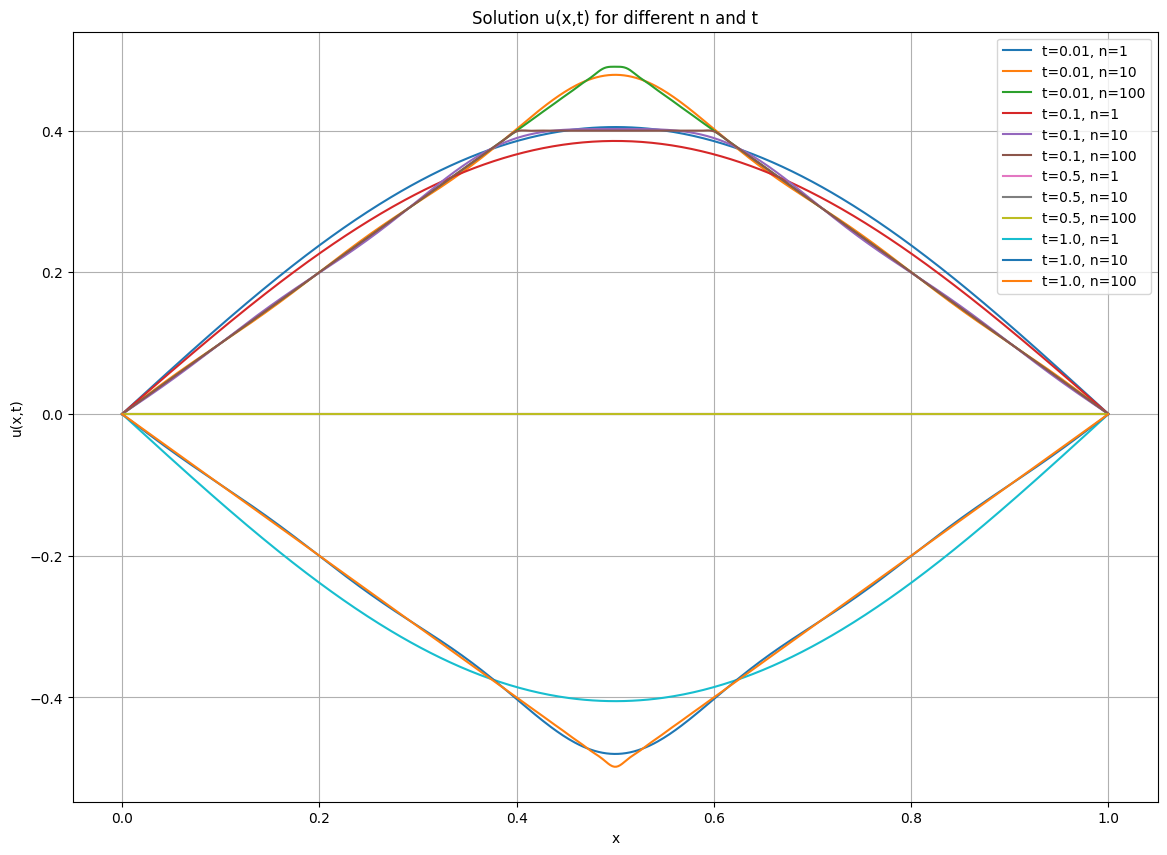

In [27]:
# distinto numero de terminos, tiempos en una grafica
x = np.linspace(0, 1, 500)


# calcule los n terms
def u_n(x,t,n):
    return a_n(n)*np.sin(n*np.pi*x/l)*np.cos(n*np.pi*c*t/l)

# calcule la solucion
def u(x,t,n_terms):
    u_xt = np.zeros_like(x)
    for n in range(1, n_terms+1):
        u_xt += u_n(x,t,n)
    return u_xt

# defina tiempos intermedios
time_points = [0.01, 0.1, 0.5, 1.0]
n_values=[1,10,100]

plt.figure(figsize=(14,10))

# graficamos solucion para diferentes tiempos y n-terms
for i, t in enumerate(time_points):
    for n_terms in n_values:
        u_xt = u(x,t,n_terms)
        plt.plot(x, u_xt, label=f't={t}, n={n_terms}')

plt.title('Solution u(x,t) for different n and t')
plt.xlabel('x')
plt.ylabel('u(x,t)')
plt.legend()
plt.grid(True)
plt.show()


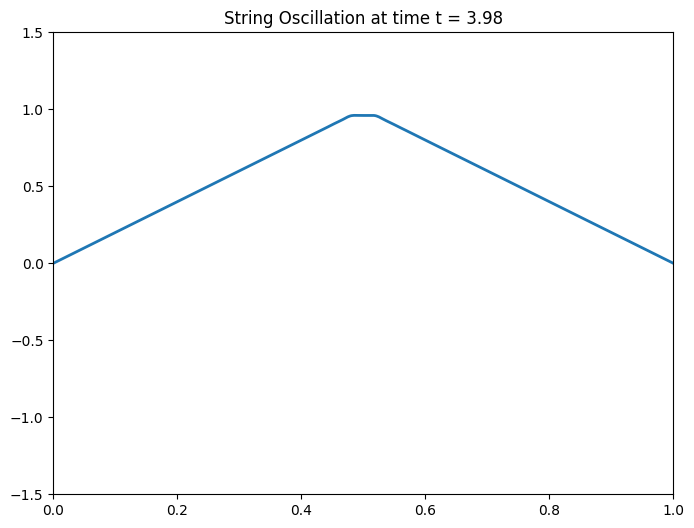

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Define parameters
ell = 1.0  # Length of the domain
c = 1.0    # Wave speed
x = np.linspace(0, ell, 500)  # Spatial domain

# Define the initial condition phi(x)
# define the initial condition phi(x)
def phi(x):
    return np.piecewise(x,
        [x < 0, (x >= 0) & (x <= 0.5), (x > 0.5) & (x <= 1), x > 1],
        [lambda x: 0, lambda x: 2*x, lambda x: -2*x + 2, lambda x: 0])



# Calculate the coefficients a_n
def a_n(n):
    return 2 / ell * np.trapz(phi(x) * np.sin(n * np.pi * x / ell), x)

# Calculate the nth term in the series for u(x, t)
def u_n(x, t, n):
    a = a_n(n)
    return a * np.sin(n * np.pi * x / ell) * np.cos(n * np.pi * c * t / ell)

# Calculate the solution u(x, t) with n_terms terms
def u(x, t, n_terms):
    u_xt = np.zeros_like(x)
    for n in range(1, n_terms + 1):
        u_xt += u_n(x, t, n)
    return u_xt

# Setup the figure and axis
fig, ax = plt.subplots(figsize=(8, 6))
ax.set_xlim(0, ell)
ax.set_ylim(-1.5, 1.5)
line, = ax.plot([], [], lw=2)

# Number of Fourier terms to use in the sum
n_terms = 100

# Initialize the plot
def init():
    line.set_data([], [])
    return line,

# Update the plot for each frame
def update(frame):
    t = frame / 50  # Control speed of the animation by adjusting the denominator
    u_xt = u(x, t, n_terms)
    line.set_data(x, u_xt)
    ax.set_title(f'String Oscillation at time t = {t:.2f}')
    return line,

# Create the animation
ani = FuncAnimation(fig, update, frames=np.arange(0, 200), init_func=init, blit=True)

# Save the animation as an MP4 file (optional)
# ani.save('string_oscillation.mp4', writer='ffmpeg')
ani.save('sepOfVarwe_animation.gif', writer='imagemagick')  # Uncomment to save as GIF


# Show the animation
plt.show()

## El metodo de separacion de variables de la ecuacion de Calor (Fourier)
El problema que queremos resolver es

\begin{eqnarray}
\begin{cases}
u_t = \alpha u_{xx} \\
u(0,t) = u(\ell, t) = 0 \quad , \quad \text{condiciones de borde} \\
u(x,0) = \varphi(x)  \quad , \quad \text{condicion inicial}
\end{cases}
\end{eqnarray}
Es el caso de una barra en el intervalo $[0, \ell]$

Asumimos separacion de variables

$$u(x,t) = F(x) G(t) $$
Tomamos derivadas

$$u_t = F(x) G'(t) \quad , \quad u_{xx} = F''(x) G(t) $$
intertamos las derivadas en la ecuacion de calor

$$F(x) G'(t) = \alpha F''(x) G(t) $$
reagrupando

$$ \frac{F''(x)}{F(x)}= \frac{1}{\alpha} \frac{G'(t)}{G(t)} = k $$

Aca $k$ es constante por que no hay funcion **de una sola variable** que sea funcion de $x$ y despues de $t$ a no ser la constate. Esto resulta en 2 ecuaciones ordinarias ODE

$$ F''(x)  = k F(x) \quad , \quad G'(t) = k \alpha G(t) $$

El problema $F''(x) = k F(x)$ ya lo resolvimos en la ecuacion de onda y la
solucion fue

$$F(x) = C_2  \sin \frac{n \pi x}{\ell} $$
Vamos a la parte de tiempo.

$$G'(t) = k \alpha G(t) $$
Encontramos antes que $k =-\lambda^2$, $\lambda=n \pi /\ell$. debemos
resolver entonces

$$\frac{G'(t)}{G(t)} = - \left ( \frac{n \pi}{\ell}  \right )^2 \alpha $$
La solucion es


$$G(t) = C_3 \mathrm{e}^{- \alpha \frac{\pi^2 n^2}{\ell^2} t} $$


Recuerde que $u(x,t)=F(x) G(t)$ y hacemos **superposicion**

La solucion es, hasta el momento,

$$u(x,t) = \sum_{i=1}^{\infty} 2 C_2 C_3 \sin \frac{n \pi x}{\ell} \mathrm{e}^{-\frac{\alpha n^2 \pi^2}{\ell^2}t } $$
Pero normalmente lsas $C_2,C_3$ cambian para cada $n$ las renombramos como

$$a_n = 2 C_2 C_3 $$
La solucion

$$u(x,t)= \sum_{i=1}^\infty a_i \sin \frac{i \pi x}{\ell} \mathrm{e}^{-\frac{\alpha n^2 \pi^2}{\ell}t} $$

Finalmente necesitamos hallar los $a_i$.
La condicion inicial, $t=0$

$$u(x,0)= \varphi(x)= \sum_{i=1}^\infty a_i \sin \frac{i \pi x}{\ell}  $$

Para hallar los coefficientes $a_i$ toca proyectar la condicion inicial $\varphi(x)$ sobre las autofunciones. Esto ya lo hicimos en la clase anterior
Si
$$\{ f_i \} = \left \{ \sin \frac{n \pi x}{\ell} \right \}_{n=1}^{\infty} $$

Probamos en la clase anterior

$$\langle f_i , f_j \rangle = \frac{\ell}{2} \delta_{ij} $$

Los coeficientes $a_n$ se extraen


$$ \left \langle  \varphi(x), \sin \frac{j \pi}{\ell }\right \rangle  
= \sum_{i=1}^{\infty} a_i \left \langle  \sin \frac{i \pi x}{\ell} , \sin \frac{j \pi x}{\ell} \right \rangle = \sum_{n=1}^{\infty} a_i \delta_{ij} \frac{\ell}{2} = a_i \frac{\ell}{2} $$
Despejamos $a_i$ y encontramos


$$ u(x,t)= \sum_{i=1}^\infty a_i \sin \frac{i \pi x}{\ell} \mathrm{e}^{-\frac{\alpha n^2 \pi^2}{\ell}t}  $$

con
$$a_i = \frac{2}{\ell} \int_0^\ell \varphi(x) \sin \frac{n \pi x}{\ell}. $$

Historia de esta clase (lo que sigue).
En la clase de metodos numericos avanzados les puse a programr un ejemplo que tenia solucion analitica, pero esta era incorrecta. Me tome dia y medio en econtrar la solucion. Lo que vamos a ver enseguida lo resolve entre 4 y 7 am del miercoles hace 15 dias.

El problema es:

\begin{eqnarray}
\begin{cases}
u_t - \alpha u_{xx}  0  \quad , \quad \text{ecuacion de calor sin fuente} \\
u(x,0) = \delta(x) \quad , \quad \text{condicion inicial} \\
u(-L/2, t)= u(L/2,t)=0  \quad , \quad \text{condiciones de frontera}
\end{cases}
\end{eqnarray}
La dificultad en este problema con respecto al anterior es que la barra esta en
$[-L/2,L/2]$. Vamos a ver como esto hace que las condiciones de frontera sean un poco mas complicadas.


1.  Asumir separacion de variables:
    $$ u(x,t) = F(x) G(t) $$
2.  Tomar las derivadas e insertar en la ecuacion de calor
    $$ u_t = F(x) G'(t)  \quad , \quad u_{xx} = F''(x) G(t) $$
3.  Agrupar terminos y generar 2 ODE (Ordinary Differential Equations)
    $$ \frac{F''(x)}{F(x)} = \frac{1}{\alpha} \frac{G'(t)}{G(t)} = k $$
    De aca salen 2 ODEs
    $$F''(x) = k F(x)  \quad \quad G'(t) = k \alpha G(t) $$
4.  Resolvemos la ecuacion en $x$
    Hacemos el analisis caso por caso.
    * $k=0$

    De $F''(x)=0$, $F(x)=C_1 + C_2 x$.

    Con las condiciones de bordo $u(\pm L/2, t) = F(\pm L/2)G(t)=0$

    \begin{eqnarray}
    C_1 + \frac{C_2 L}{2} = 0  \\
    C_1 - \frac{C_2 L}{2} = 0  
    \end{eqnarray}
    Claramente $C_1=C_2=0$

    * $k>0$. Digamos $k = \lambda^2$, y tenemos

    $$ F''(x) = \lambda^2 F(x) \quad , \quad G'(t) = \lambda^2 \alpha G(t) $$
    De la solucion en espacio tenemos dos exponenciales

    $$F(x) = C_1 \mathrm{e}^{\lambda x} + C_2 \mathrm{e}^{-\lambda x} $$

    Aplicando las condiciones iniciales

    $$C_1 \mathrm{e}^{-\lambda L/2} + C_2 \mathrm{e}^{\lambda L/2} = 0 $$
    $$C_1 \mathrm{e}^{\lambda L/2} + C_2 \mathrm{e}^{-\lambda L/2} = 0 \tag{1}$$
    Si sumamos las dos nos da

    $$C_1( \mathrm{e}^{\lambda L/2} + \mathrm{e}^{-\lambda L/2}) + C_2 ({e}^{\lambda L/2} + \mathrm{e}^{-\lambda L/2}) =  2(C_1 + C_2) \cosh (\lambda L/2) $$
    La unica forma de que esto sea 0 es que $C_1 = -C_2$.
    Entonces tendriamos de (1)

    $$C_1 ( \mathrm{e}^{\lambda L/2}  - \mathrm{e}^{-\lambda L/2})=0 $$
    Como el segundo factor no puede ser 0,entonces $C_1=C_2=0$ pero entonces
    $F(x)=0$, $u(x,t)=0$ y es la trivial.

    No quedamos con la ultima opcion

    * $k<0$, $k = -\lambda^2$
    Esto produce dos soluciones exponenciales complejas (esta es la parte oscilatoria)

    $$F(x) = C_1 \mathrm{e}^{\mathrm{i} \lambda x}  + C_2 \mathrm{e}^{-\mathrm{i} \lambda x}  $$

    esto se puede escrbir en terminos de senos y cosenos (tarea)
    Es decir
    $$F(x) = C_1 \cos \lambda x + C_2 \sin \lambda x $$

    Encontrar los valores de $C_1, C_2$ aca no es facil.
    Aplicamos un corrimiento (shift)

    $$\hat{x} = x + \frac{L}{2} $$
    Cuando $x=-L/2$, $\hat{x}=0$, cuando $x=L/2$, $\hat{x}=L$
    En las nuevas coordenadas $\hat{x}$ la barra esta en $[0, L]$.
    Las condiciones de frontera en la nueva variable son

    $$F(-L/2) = C_1 \sin 0 + C_2 \cos 0 =0 \tag{2} $$
    $$F(L/2) = C_1 \sin \lambda L + C_2 \cos \lambda L =0 \tag{3} $$
    DE (2) tenemos que $C_2=0$ y de (3)

    $$C_1 \sin \lambda L = 0 $$

    como no queremos soluciones triviales (no queremos $C_1=0$)
    debemos tener que
    $$ \lambda L = n \pi $$
    $$ \lambda = \frac{n \pi}{L} $$

    Las autofunciones respectivas son

    $$F_n(\hat{x}) = C_{1n} \sin \frac{n \pi}{L} \hat{x} $$
    Reemplazamos $\hat{x} = x + L/2$ y encontramos

    $$F_n(x) = C_{1n} \sin \left [ \left ( \frac{n \pi}{L}  \right )
    \left ( x + \frac{L}{2} \right ) \right ] $$

5.  Resolvemos la ecuacion en $t$

    $$G(t) = C_3 \mathrm{e}^{- \alpha \lambda^2 t}  $$
    aplicamos eso a $\lambda=\lambda_n$, $C_3=C_{3n}$
    $$ Gn(t) = C_{3n} \mathrm{e}^{- \left ( \frac{n \pi}{L} \right )^2  \alpha t} $$

6. Construimos $u(x,t)=F(x) G(t)$ y hacemos superposicion con $a_n=C_{1n}C_{3n}$
es decir

$$ u(x,t) = \sum_{n=1}^{\infty} a_n \sin \left [ \left ( \frac{n \pi}{L}  \right )  \right ] \left (  x + \frac{L}{2} \right ) \mathrm{e}^{- \left ( \frac{n \pi}{L}  \right )^2 \alpha t} $$

7. Usamos la condiciones iniciales y la proyeccion de la condicion inicial sobre las autofunciones para encontrar $a_n$.


$$ u(x,0) = \delta(x) = \sum_{n=1}^{\infty} a_n \sin \left [ \left ( \frac{n \pi}{L}  \right )  \right ] \left (  x + \frac{L}{2} \right ) $$

Sea
$$ B= \{ \varphi_n \} = \left \{  \sin \left [  \left ( \frac{n \pi}{L} \right ) \right ] \left ( x + \frac{L}{2} \right )   \right \}_{n=1}^{\infty}   $$

Proyectamos $\varphi(x) = \delta(x)$ sobre la base $B$

$$\langle \varphi(x), \phi_k \rangle = \sum_{n=1}^{\infty} a_n
\left \langle \varphi(x),  \phi_k  \right \rangle   $$

Calculemos el producto interno de las autofunciones

$$\langle \phi_n(x), \phi_k(x) \rangle = \int_{-L/2}^{L/2}
\sin \left [  
     \left ( \frac{n \pi}{L} \left ( x + \frac{L}{2}  \right )  \right )\right  ]   
\sin \left [  
     \left ( \frac{k \pi}{L} \left ( x + \frac{L}{2}  \right )  \right )\right  ]  dx = \delta_{nk} \frac{L}{2}.
     $$

De aca

$$ a_i = \frac{2}{\ell} \left \langle \varphi(x), \sin \frac{i \pi x}{\ell} \right \rangle  = \frac{2}{\ell} \int_{-L/2}^{L/2} \varphi(x) \sin  \frac{i \pi x}{L} dx $$

Finalmente la solucion es

$$u(x,t) = \sum_{i=1}^{\infty} a_i \sin \frac{i \pi x}{L} \mathrm{e}^{-(\alpha \pi^2/L^2) t} $$

con


$$a_i = \frac{2}{L} \int_{-L/2}^{L/2} \varphi(x) \sin  \frac{i \pi}{L} \left ( x + \frac{L}{2} \right ) dx  $$
Cuando $\varphi(x) = \delta(x)$

$$a_i= \frac{2}{L} \sin \frac{i \pi}{2} $$
